# **Import library**

In [ ]:
# !pip install ultralytics

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import os
import shutil
import yaml
import warnings

#import wandb
import random

import cv2
from PIL import Image
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# **to uploud imeage and file in colab**

In [6]:
# from google.colab import files

# # Upload the YOLO model file
# uploaded = files.upload()
# yolo_model_path = list(uploaded.keys())[0]  # Get the filename

# # Upload the image file
# uploaded = files.upload()
# image_path = list(uploaded.keys())[0]  # Get the filename

Saving yolo11m_car_plate_trained.pt to yolo11m_car_plate_trained.pt


Saving original_cut.jpeg to original_cut.jpeg

image 1/1 /content/original_cut.jpeg: 640x544 1 car_plate, 2107.2ms
Speed: 34.3ms preprocess, 2107.2ms inference, 31.5ms postprocess per image at shape (1, 3, 640, 544)


# **Function for crop image "YOLO model"**

In [4]:
def crop_image_yolo (image_path ,yolo_model_path):

    model = YOLO(yolo_model_path)
    count = 0

    # Perform prediction on the image
    results = model.predict(source=image_path, conf=0.25)

    # Open the image
    image = Image.open(image_path)

    for result in results:
        if result.boxes is not None and len(result.boxes) > 0:
            max_width = -1
            selected_box = None

            # Iterate through all detected boxes to find the one with the maximum width
            for box in result.boxes:
                res = box.xyxy[0]  # Get the coordinates of the bounding box
                width = res[2].item() - res[0].item()  # Calculate width (x_max - x_min)

                if width > max_width:
                    max_width = width
                    selected_box = res  # Store the coordinates of the selected box

            if selected_box is not None:
                x_min = selected_box[0].item()
                y_min = selected_box[1].item()
                x_max = selected_box[2].item()
                y_max = selected_box[3].item()

                # Crop the image using the bounding box coordinates
                cropped_image = image.crop((x_min, y_min, x_max, y_max))

                return cropped_image


image 1/1 /content/original_2.jpg: 352x640 1 car_plate, 878.3ms
Speed: 6.9ms preprocess, 878.3ms inference, 0.9ms postprocess per image at shape (1, 3, 352, 640)


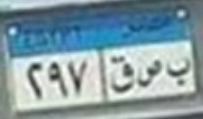

In [40]:
# Now use these paths in your function call:
resize_image3 = crop_image_yolo("/content/original_2.jpg", "/content/yolo11m_car_plate_trained.pt")

resize_image3

In [ ]:
# !pip install paddleocr

In [ ]:
# !pip install paddlepaddle

In [ ]:
# !pip install arabic-reshaper python-bidi

# **Function for read text in plate "OCR model"**

In [25]:
from paddleocr import PaddleOCR
import arabic_reshaper
from bidi.algorithm import get_display

def detect_text_with_paddleocr(cropped_image):
    ocr = PaddleOCR(use_angle_cls=True, lang='ar')
    image = cv2.cvtColor(np.array(cropped_image), cv2.COLOR_RGB2BGR)
    results = ocr.ocr(image, cls=True)
    detected_texts = []

    for result in results:
        for (bbox, (text, prob)) in result:
            # Check if the detected text contains only digits
            if text.isdigit():
                # Reverse the digits
                reversed_text = text[::-1]
            else:
                # Reverse and reshape Arabic text
                reshaped_text = arabic_reshaper.reshape(text)
                reversed_text = get_display(reshaped_text)

            detected_texts.append(reversed_text)
            print(f"Detected text: {reversed_text}")

    return detected_texts

In [29]:
text = detect_text_with_paddleocr(cropped_image=resize_image3)

[2024/12/04 18:50:45] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/arabic/arabic_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_tex

In [28]:
text

['٢٩٧', 'ﺏ ﺺﻗ']

# **The complite Function**

In [42]:
def get_text_plate (image_path ,yolo_model_path):

    model = YOLO(yolo_model_path)
    count = 0

    # Perform prediction on the image
    results = model.predict(source=image_path, conf=0.25)

    # Open the image
    image = Image.open(image_path)

    for result in results:
        if result.boxes is not None and len(result.boxes) > 0:
            max_width = -1
            selected_box = None

            # Iterate through all detected boxes to find the one with the maximum width
            for box in result.boxes:
                res = box.xyxy[0]  # Get the coordinates of the bounding box
                width = res[2].item() - res[0].item()  # Calculate width (x_max - x_min)

                if width > max_width:
                    max_width = width
                    selected_box = res  # Store the coordinates of the selected box

            if selected_box is not None:
                x_min = selected_box[0].item()
                y_min = selected_box[1].item()
                x_max = selected_box[2].item()
                y_max = selected_box[3].item()

                # Crop the image using the bounding box coordinates
                cropped_image = image.crop((x_min, y_min, x_max, y_max))
    # Make the ocr
    ocr = PaddleOCR(use_angle_cls=True, lang='ar')
    image = cv2.cvtColor(np.array(cropped_image), cv2.COLOR_RGB2BGR)
    results = ocr.ocr(image, cls=True)
    detected_texts = []

    for result in results:
        for (bbox, (text, prob)) in result:
            # Check if the detected text contains only digits
            if text.isdigit():
                # Reverse the digits
                reversed_text = text[::-1]
            else:
                # Reverse and reshape Arabic text
                reshaped_text = arabic_reshaper.reshape(text)
                reversed_text = get_display(reshaped_text)

            detected_texts.append(reversed_text)
            print(f"Detected text: {reversed_text}")

    return detected_texts

In [43]:
text = get_text_plate("/content/original_2.jpg", "/content/yolo11m_car_plate_trained.pt")


image 1/1 /content/original_2.jpg: 352x640 1 car_plate, 805.6ms
Speed: 5.7ms preprocess, 805.6ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)
[2024/12/04 19:23:31] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVT

In [44]:
text

['٢٩٧', 'ﺏ ﺺﻗ']